## Bike Share in Washington D.C.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# To see all the columns after doing Feature Engineering, otherwise normally it displays only few columns.
pd.options.display.max_columns = 999

## Get the Data

In [2]:
bike = pd.read_csv('./data/train.csv', parse_dates=True, index_col=0)
bike.sample(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-08-12 20:00:00,3,0,0,1,29.52,32.575,45,0.0000,96,204,300
2012-11-16 03:00:00,4,0,1,2,12.30,15.150,65,8.9981,0,6,6
2012-07-14 14:00:00,3,0,0,1,32.80,37.880,55,7.0015,269,363,632
2011-10-15 23:00:00,4,0,0,1,19.68,23.485,41,11.0014,33,102,135
2012-06-09 16:00:00,2,0,0,1,33.62,34.850,24,12.9980,219,315,534


In [3]:
# Displays number of rows and columns of our DataFrame

bike.shape

(10886, 11)

In [4]:
# Parsing the datetime 

bike['hour'] = bike.index.hour
bike['month'] = bike.index.month
bike['DayOfWeek'] = bike.index.day_name()
bike.sample(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,DayOfWeek
datetime,,,,,,,,,,,,,,
2012-04-14 06:00:00,2,0,0,1,13.94,16.665,76,11.0014,2,19,21,6,4,Saturday
2011-09-12 17:00:00,3,0,1,1,29.52,33.335,51,11.0014,75,515,590,17,9,Monday
2011-09-13 12:00:00,3,0,1,1,29.52,33.335,58,15.0013,43,144,187,12,9,Tuesday
2011-05-11 20:00:00,2,0,1,1,22.14,25.760,64,8.9981,28,245,273,20,5,Wednesday
2012-07-12 02:00:00,3,0,1,2,27.06,31.060,65,6.0032,0,9,9,2,7,Thursday


In [5]:
bike.shape

(10886, 14)

In [6]:
# Displays Statistical Information

bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,6.521495
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,3.444373
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,4.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,7.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,10.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,12.000000


In [7]:
# Displays "DataType" information

bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  hour        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  DayOfWeek   10886 non-null  object 
dtypes: float64(3), int64(10), object(1)
memory usage: 1.2+ MB


In [8]:
# Displays unique values

bike.apply(lambda x: len(x.unique()))

season          4
holiday         2
workingday      2
weather         4
temp           49
atemp          60
humidity       89
windspeed      28
casual        309
registered    731
count         822
hour           24
month          12
DayOfWeek       7
dtype: int64

## Preprocessing Data

In [9]:
# Check for NaN/null values in the DataFrame

bike.isna().sum()
# bike.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
month         0
DayOfWeek     0
dtype: int64

## Visualizing the Data

### Correlation Matrix

In [10]:
bike.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.006546,0.971524
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354,0.001731
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780,-0.003394
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.022740,0.012144
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430,0.257589
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343,0.264173
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011,0.204537
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631,-0.150192
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045,0.092722
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540,0.169451


<AxesSubplot:>

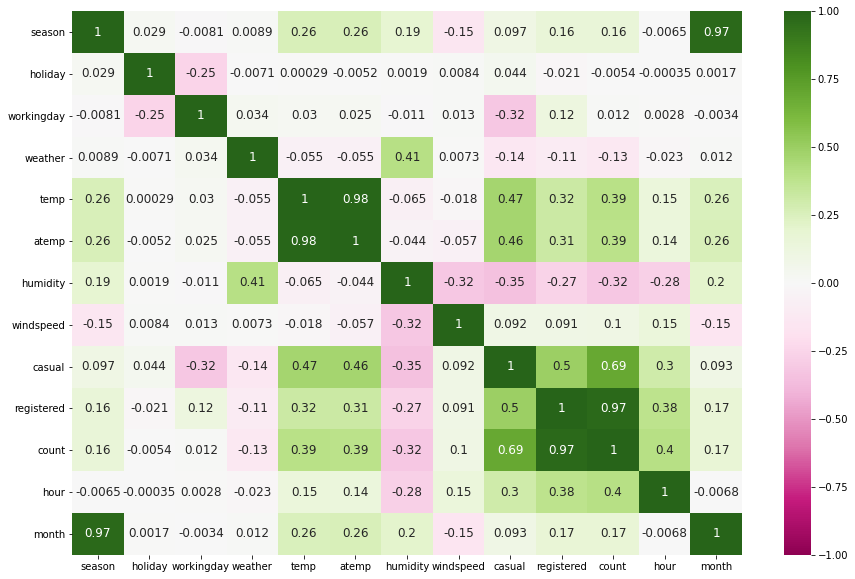

In [11]:
corr = bike.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            vmin=-1, 
            vmax=1, 
            cmap="PiYG", 
            annot=True, 
            annot_kws={'size':12},
            )

Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')

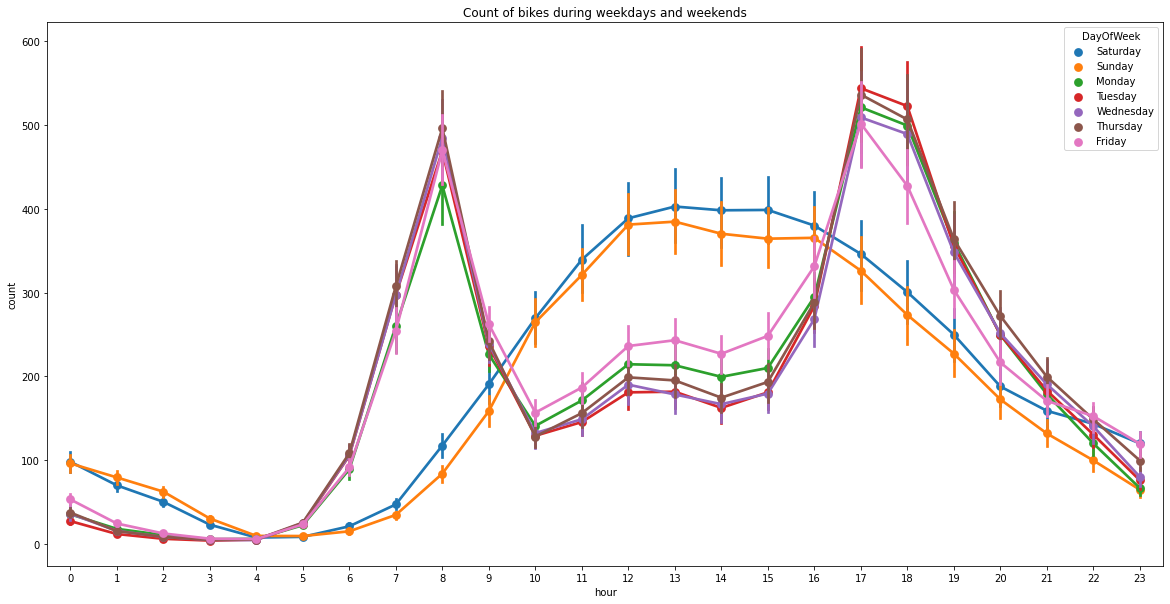

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(data=bike, x='hour', y='count', hue='DayOfWeek', ax=ax)
plt.title('Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

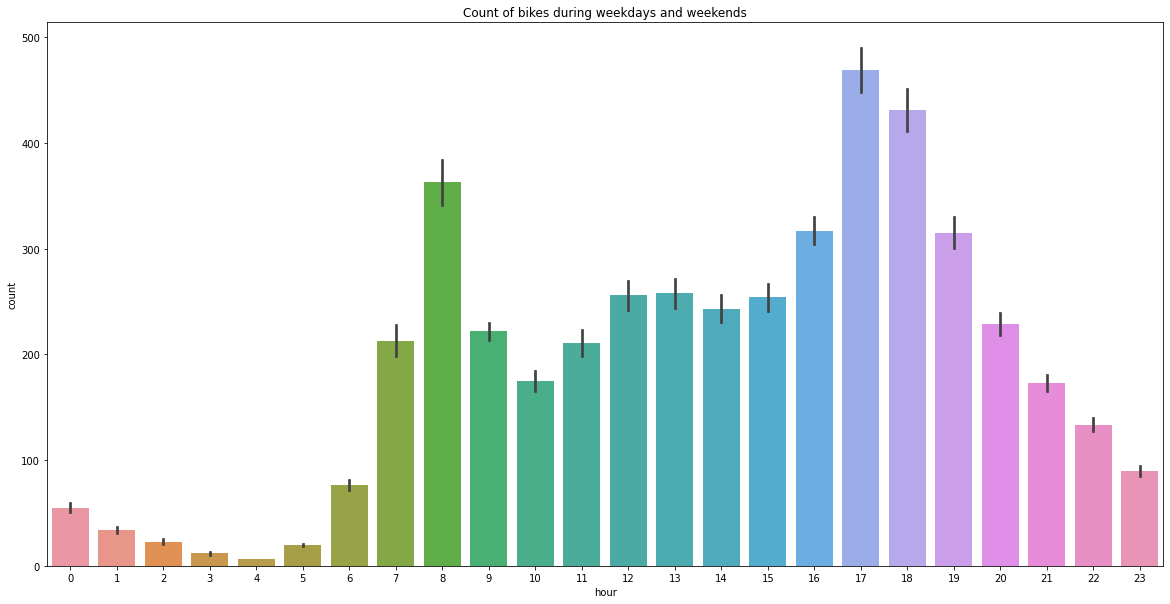

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=bike, x='hour', y='count')
ax.set(title='Count of bikes during weekdays and weekends')

In [14]:
bike_workday = bike.groupby('workingday').agg({'casual':'sum','registered': 'sum'})
bike_workday.rename(index={0: 'Not WorkDay',1: 'WorkDay'}, inplace=True)

bike_workday

,casual,registered
workingday,,
Not WorkDay,206037,448835
WorkDay,186098,1244506


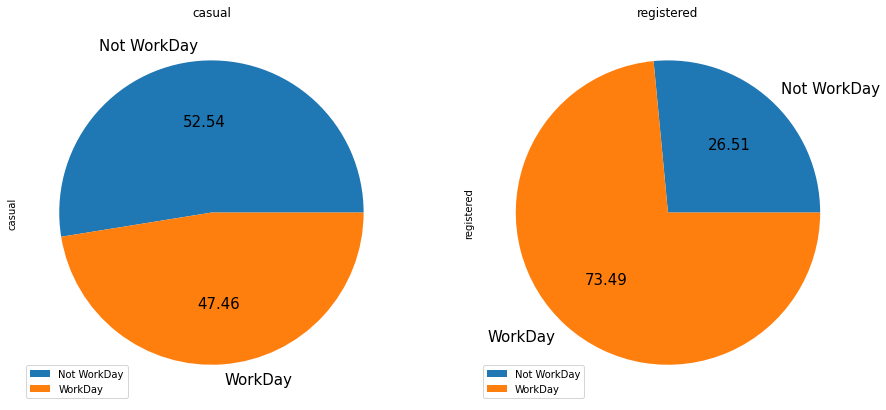

In [15]:
f, axes = plt.subplots(1,2, figsize=(15,10))

for ax, col in zip(axes, bike_workday.columns):
    bike_workday[col].plot(kind='pie', autopct='%.2f', ax=ax, title=col, fontsize=15)
    ax.legend(loc=3)

Text(0.5, 1.0, 'Count of Bikes during different months.')

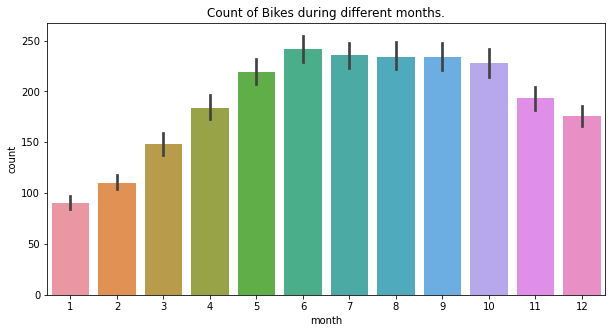

In [16]:
fig = plt.subplots(figsize=(10, 5))
sns.barplot(data=bike, x='month', y='count')
plt.title("Count of Bikes during different months.")

Text(0.5, 1.0, 'Count of Bikes during different Days.')

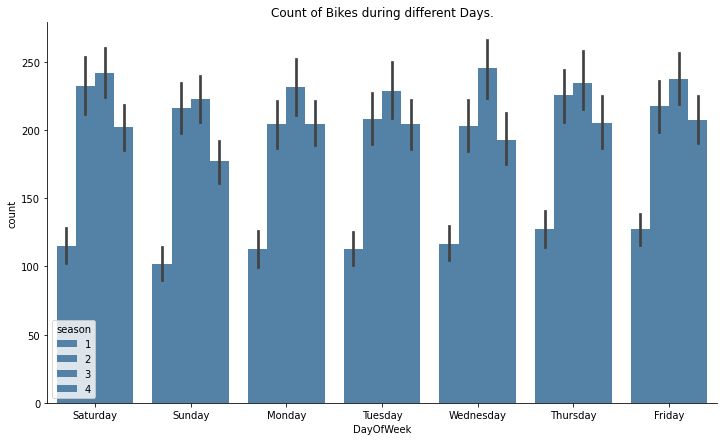

In [17]:
fig = plt.subplots(figsize=(12, 7))
sns.barplot(data=bike, x='DayOfWeek', y='count', hue='season', palette=['steelblue'])
sns.despine()
plt.title("Count of Bikes during different Days.")

Text(0.5, 1.0, 'Count of Bikes during different Seasons of the year.')

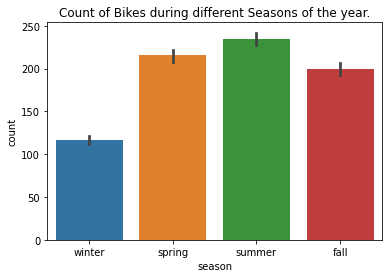

In [18]:
sns.barplot(x='season', y='count', data=bike)
plt.xticks(ticks=[0, 1, 2, 3], labels=['winter', 'spring', 'summer', 'fall'])
plt.title("Count of Bikes during different Seasons of the year.")

Text(0.5, 1.0, 'Relation between Humidity and Users')

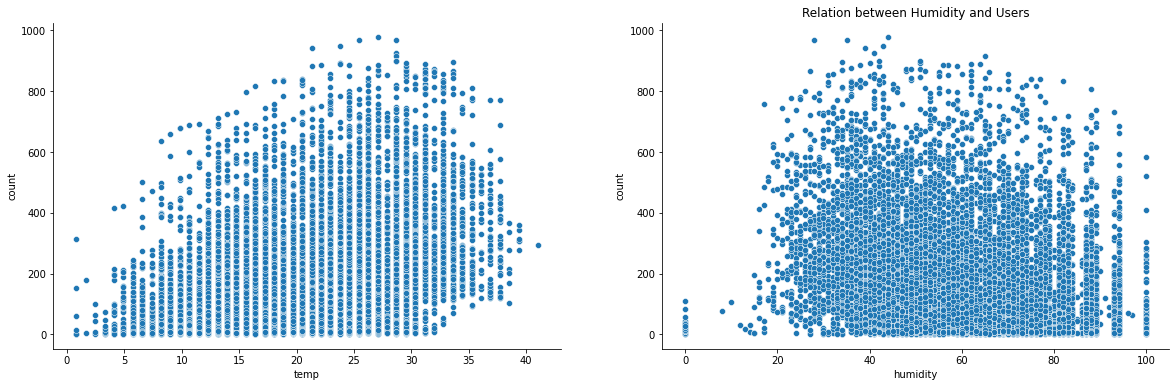

In [19]:
# Realtion between Temperature and Humidity for Usage

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))   # ax1, ax2 - Temperature and Humidity

# Temperature and Users, when Temperature increases, no.of Users also increases
sns.scatterplot(x=bike['temp'], y=bike['count'], ax=ax1)
plt.title('Relation between Temperature and Users')

# Humidity and Users , when Humidity increases no.of Users decreases.
sns.scatterplot(x=bike['humidity'], y=bike['count'], ax=ax2)
sns.despine()
plt.title('Relation between Humidity and Users')  

### Select columns for Feature Matrix (X) and target(y)

In [20]:
X = bike[['holiday', 'workingday', 'temp', 'windspeed', 'season', 'weather', 'DayOfWeek', 'month', 'hour']]
y = bike['count']

In [21]:
X.head()

,holiday,workingday,temp,windspeed,season,weather,DayOfWeek,month,hour
datetime,,,,,,,,,
2011-01-01 00:00:00,0,0,9.84,0.0,1,1,Saturday,1,0
2011-01-01 01:00:00,0,0,9.02,0.0,1,1,Saturday,1,1
2011-01-01 02:00:00,0,0,9.02,0.0,1,1,Saturday,1,2
2011-01-01 03:00:00,0,0,9.84,0.0,1,1,Saturday,1,3
2011-01-01 04:00:00,0,0,9.84,0.0,1,1,Saturday,1,4


### Splitting data into train and test - not Required while working with Kaggle Dataset

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
# X_train.shape, X_test.shape

### Feature Engineering

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [25]:
fe_eng = ColumnTransformer([
    ('Scaling', MinMaxScaler(), ['temp', 'windspeed']),
    ('do-nothing', 'passthrough', ['holiday', 'workingday']),
    ('One-Hot-Encoding', OneHotEncoder(sparse=False, handle_unknown = 'ignore'), ['season', 'weather', 'DayOfWeek', 'month', 'hour'])  
])

In [27]:
# fit the column transformer on the training data

# fe_eng.fit(X_train)

## Model selection

In [28]:
model = make_pipeline(
    fe_eng,
#     PolynomialFeatures(degree=2, include_bias=False),  # not Required for Random Forest (bcz increases calculation time)
    RandomForestRegressor(n_estimators=30, max_depth=32) # 32
)

In [29]:
from sklearn.model_selection import cross_validate

## Cross Validation

In [30]:
from sklearn.metrics import make_scorer

In [31]:
def rmsle(y, yhat):
    yhat[yhat<0]=0
    return mean_squared_log_error(y, yhat)**0.5

rmsle_loss = make_scorer(rmsle, greater_is_better=False)

In [32]:
cv_results = cross_validate(
    estimator=model,             # the model you want to evaluate 
    X=X,                     # the training input data 
    y=y,                     # the training output data  
    cv=5,                    # number of cross validation datasets 
    scoring=rmsle_loss,          # evaluation metric 
    return_train_score=True,   # return both the score on the training and the cross validated data
    n_jobs=-1                   # n_jobs = -1 for using all your processores
)

In [33]:
# show results in dataframe
df_cv_results = pd.DataFrame(cv_results)
df_cv_results

,fit_time,score_time,test_score,train_score
0,6.441105,0.088562,-0.852181,-0.182484
1,5.770129,0.087063,-0.520217,-0.222602
2,6.094358,0.082058,-0.657388,-0.213336
3,6.016805,0.121585,-0.549382,-0.222619
4,3.019655,0.057541,-0.483224,-0.219217


In [34]:
# take a look at the mean of all the results

df_cv_results.mean()

fit_time       5.468410
score_time     0.087362
test_score    -0.612478
train_score   -0.212052
dtype: float64

In [35]:
# fit and transform the Training data
model.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Scaling', MinMaxScaler(),
                                                  ['temp', 'windspeed']),
                                                 ('do-nothing', 'passthrough',
                                                  ['holiday', 'workingday']),
                                                 ('One-Hot-Encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['season', 'weather',
                                                   'DayOfWeek', 'month',
                                                   'hour'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=32, n_estimators=30))])

#### Not Required while using Cross_Validation

In [ ]:
# Transforming and Predicting Test data

# y_pred = model.predict(X_test)

In [ ]:
# y_pred.max(), y_pred.min()

In [ ]:
# plt.scatter(y_test, y_pred)

In [ ]:
# metrics.mean_absolute_error(y_test, y_pred)

In [ ]:
# root mean squared log error(RMSLE)
# y_pred[y_pred<0] = 0
# metrics.mean_squared_log_error(y_test, y_pred)**0.5

## Kaggle

In [36]:
bike_test = pd.read_csv('./data/test.csv', parse_dates=True, index_col=0)
bike_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [37]:
bike_test.shape

(6493, 8)

In [38]:
# Parsing the datetime 

bike_test['hour'] = bike_test.index.hour
bike_test['month'] = bike_test.index.month
bike_test['DayOfWeek'] = bike_test.index.day_name()
bike_test.sample(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month,DayOfWeek
datetime,,,,,,,,,,,
2011-08-25 07:00:00,3,0,1,2,27.88,31.820,79,22.0028,7,8,Thursday
2011-01-24 19:00:00,1,0,1,1,5.74,7.575,54,11.0014,19,1,Monday
2011-03-23 06:00:00,2,0,1,2,13.94,15.910,87,16.9979,6,3,Wednesday
2012-10-31 04:00:00,4,0,1,2,12.30,14.395,87,12.9980,4,10,Wednesday
2012-07-31 17:00:00,3,0,1,1,31.98,35.605,52,15.0013,17,7,Tuesday


In [39]:
X_kaggle = bike_test[['holiday', 'workingday', 'temp', 'windspeed', 'season', 'weather', 'DayOfWeek', 'month', 'hour']]
X_kaggle.head()

,holiday,workingday,temp,windspeed,season,weather,DayOfWeek,month,hour
datetime,,,,,,,,,
2011-01-20 00:00:00,0,1,10.66,26.0027,1,1,Thursday,1,0
2011-01-20 01:00:00,0,1,10.66,0.0000,1,1,Thursday,1,1
2011-01-20 02:00:00,0,1,10.66,0.0000,1,1,Thursday,1,2
2011-01-20 03:00:00,0,1,10.66,11.0014,1,1,Thursday,1,3
2011-01-20 04:00:00,0,1,10.66,11.0014,1,1,Thursday,1,4


In [40]:
bike_test.reset_index(inplace=True)

In [41]:
# Prediction

y_pred = model.predict(X_kaggle)
y_pred

array([ 16.63333333,   3.86666667,   6.29444444, ..., 110.7       ,
        80.2       ,  57.06666667])

In [42]:
y_pred[y_pred<0] = 0
y_pred

array([ 16.63333333,   3.86666667,   6.29444444, ..., 110.7       ,
        80.2       ,  57.06666667])

In [43]:
output = pd.DataFrame({'datetime': bike_test['datetime'], 'count': y_pred})
output.to_csv('./bike_kaggle_submission/bike_kaggle_submission.csv', index=False)

## This approach gave me a Kaggle Score - 0.50